<a href="https://colab.research.google.com/github/ViniciusBortolini/TCC/blob/main/TCC_PROTOTIPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Montando Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 Importando Dataset

In [2]:
import pandas as pd

In [3]:
data2 = pd.read_csv("/content/drive/MyDrive/TCC/TESTE/DataSet2/UnificadoDataSet2.csv", sep=',')
data2 = data2[['ID_PACIENTE','DT_COLETA',
'PCR em tempo real para detecção de Coron/Resultado COVID-19:',
'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Dosagem de Uréia/Uréia',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Basófilos #', 
'Hemograma Contagem Auto/Eosinófilos']]
dfFinal = data2.copy()



In [4]:
dfFinal.set_index(['ID_PACIENTE', 'DT_COLETA'], inplace= True)
dfFinal.dropna(inplace= True)
dfFinal.shape

(5507, 17)

In [5]:
TotalX = dfFinal[['Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Dosagem de Uréia/Uréia',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Basófilos #', 
'Hemograma Contagem Auto/Eosinófilos'
]].values 
TotalY = dfFinal['PCR em tempo real para detecção de Coron/Resultado COVID-19:'].values


#3 Aplicando Undersampling

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter
import numpy as np


#smt = SMOTE(k_neighbors=5, random_state=42)
smt = RandomUnderSampler(sampling_strategy='auto')
Xtreino, ytreino = smt.fit_sample(TotalX, TotalY)

Counter(ytreino)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0.0: 1558, 1.0: 1558})

# 4 Montando o Dataset após o Undersampling

In [7]:
df_smote = pd.DataFrame(Xtreino)

df_smote = df_smote.rename(columns ={
0:'Hemograma com Plaquetas/CHCM',
1:'Hemograma com Plaquetas/Hematócrito',
2:'Hemograma com Plaquetas/Hemácias',
3:'Hemograma com Plaquetas/Plaquetas',
4:'Hemograma com Plaquetas/VCM',
5:'Hemograma com Plaquetas/HCM',
6:'Hemograma com Plaquetas/Hemoglobina',
7:'Hemograma com Plaquetas/Leucócitos',
8:'Hemograma com Plaquetas/Leucócitos #',
9:'Hemograma com Plaquetas/RDW',
10:'Hemograma com Plaquetas/Volume Médio Plaquetário',
11:'Dosagem de Uréia/Uréia',
12:'Hemograma Contagem Auto/Linfócitos',
13:'Hemograma Contagem Auto/Basófilos',
14:'Hemograma Contagem Auto/Basófilos #' ,
15:'Hemograma Contagem Auto/Eosinófilos'
})

df_smote = df_smote.assign(PCR =  pd.DataFrame(ytreino))
df_smote = df_smote.rename(columns ={
'PCR':'PCR em tempo real para detecção de Coron/Resultado COVID-19:'})
df_smote.head()

,Hemograma com Plaquetas/CHCM,Hemograma com Plaquetas/Hematócrito,Hemograma com Plaquetas/Hemácias,Hemograma com Plaquetas/Plaquetas,Hemograma com Plaquetas/VCM,Hemograma com Plaquetas/HCM,Hemograma com Plaquetas/Hemoglobina,Hemograma com Plaquetas/Leucócitos,Hemograma com Plaquetas/Leucócitos #,Hemograma com Plaquetas/RDW,Hemograma com Plaquetas/Volume Médio Plaquetário,Dosagem de Uréia/Uréia,Hemograma Contagem Auto/Linfócitos,Hemograma Contagem Auto/Basófilos,Hemograma Contagem Auto/Basófilos #,Hemograma Contagem Auto/Eosinófilos,PCR em tempo real para detecção de Coron/Resultado COVID-19:
0,33.799999,49.700001,6.09,347.0,81.599998,27.600000,16.799999,11.32,11320.0,12.9,9.4,35.0,13.700000,0.3,34.0,6.3,0.0
1,33.400002,46.099998,5.24,192.0,88.000000,29.400000,15.400000,7.86,7860.0,13.8,10.2,56.0,23.299999,0.5,39.0,4.3,0.0
2,32.599998,35.599998,4.03,265.0,88.300003,28.799999,11.600000,4.73,4730.0,12.5,10.2,20.0,40.599998,0.4,19.0,1.5,0.0
3,34.799999,44.599998,4.82,186.0,92.500000,32.200001,15.500000,8.08,8080.0,13.1,10.3,30.0,17.799999,0.1,8.0,1.0,0.0
4,34.900002,43.299999,4.81,269.0,90.000000,31.400000,15.100000,6.23,6230.0,12.0,12.0,34.0,30.700001,0.8,50.0,3.4,0.0


In [8]:
df_smote.shape


(3116, 17)

In [9]:
dfFinal2 = dfFinal.copy()
dfFinal2 = dfFinal2[[
'PCR em tempo real para detecção de Coron/Resultado COVID-19:',
'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Dosagem de Uréia/Uréia',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Basófilos #', 
'Hemograma Contagem Auto/Eosinófilos']]
dfFinal = dfFinal2.copy()

dfFinal2 = dfFinal.copy()
dfFinal2 = dfFinal2[[
'PCR em tempo real para detecção de Coron/Resultado COVID-19:'
]]
yy = dfFinal2.copy()

dfFinal2 = dfFinal.copy()
dfFinal2 = dfFinal2[[
#'PCR em tempo real para detecção de Coron/Resultado COVID-19:',
'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Dosagem de Uréia/Uréia',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Basófilos #', 
'Hemograma Contagem Auto/Eosinófilos']]
dfFinal = dfFinal2.copy()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score # curva de probabilidade que traça o verdadeiro positivo contra o FPR
from sklearn.model_selection import train_test_split
#quanto mais alto o roc melhor é
from scipy.stats import ks_2samp

def treino_resultado(model):
    model.fit(Xtreino, ytreino)  
    y_pred = model.predict(dfFinal)
    #Matriz Confusão e Métricas de Classificacao
    print("Matriz Confusão: \n", confusion_matrix(yy, y_pred))  
    print("Métricas de Classficação: \n", classification_report(yy, y_pred))  
    print("Acurácia: ", accuracy_score(yy, y_pred))   
    print("Revocação:", recall_score(yy, y_pred))
    #AUC e KS
    print("AUC: ", roc_auc_score(yy, y_pred))
    #print("KS: ", ks_2samp(y_pred[yy == 0], y_pred[yy == 1]).statistic)
    
X = df_smote[['Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Dosagem de Uréia/Uréia',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Basófilos #', 
'Hemograma Contagem Auto/Eosinófilos'
]].values 
y = df_smote['PCR em tempo real para detecção de Coron/Resultado COVID-19:'].values
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
print("Split between test and train!")

#Aplicando KNN
#k = 73
#knn = KNeighborsClassifier(n_neighbors=k)
#treino_resultado(knn)

rf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=42)  


treino_resultado(rf)

Split between test and train!
Matriz Confusão: 
 [[3280  669]
 [ 121 1437]]
Métricas de Classficação: 
               precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      3949
         1.0       0.68      0.92      0.78      1558

    accuracy                           0.86      5507
   macro avg       0.82      0.88      0.84      5507
weighted avg       0.88      0.86      0.86      5507

Acurácia:  0.8565462139095696
Revocação: 0.9223363286264442
AUC:  0.8764631757085122


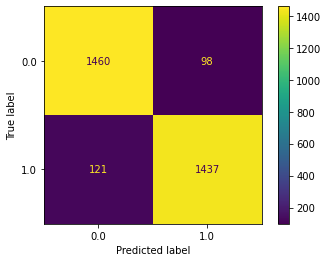

In [25]:
#NAO PRECISA MAIS EXECUTAR
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X, y, values_format="d")

'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Dosagem de Uréia/Uréia',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Basófilos #', 
'Hemograma Contagem Auto/Eosinófilos'

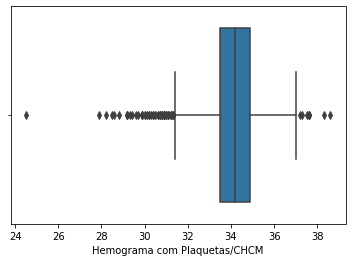

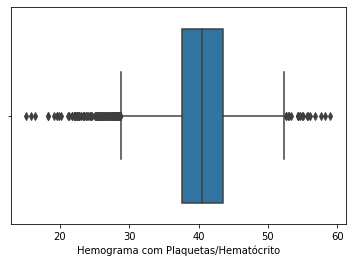

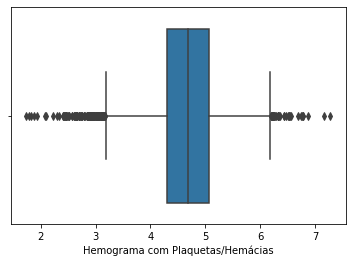

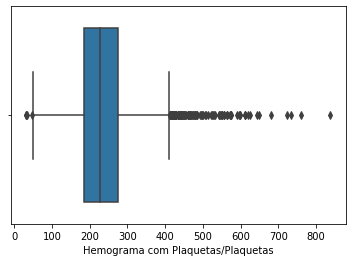

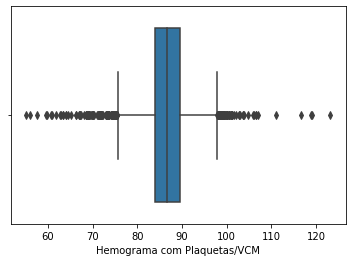

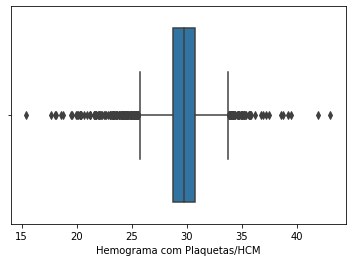

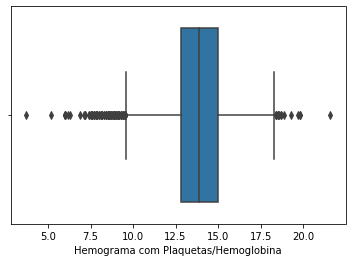

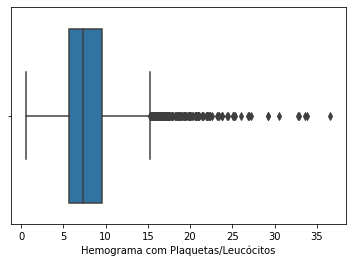

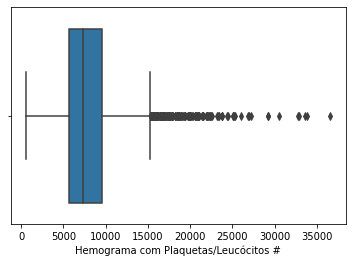

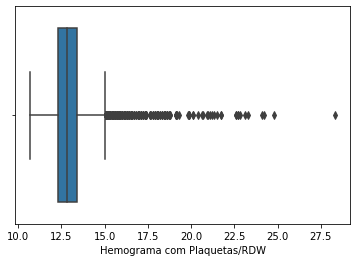

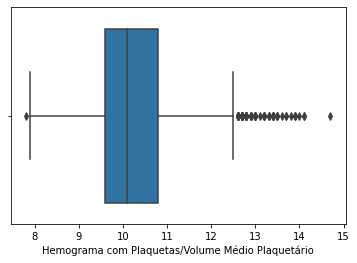

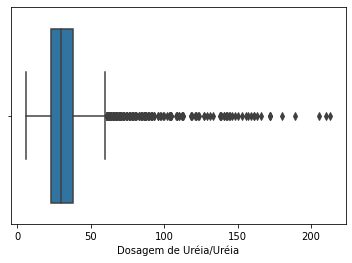

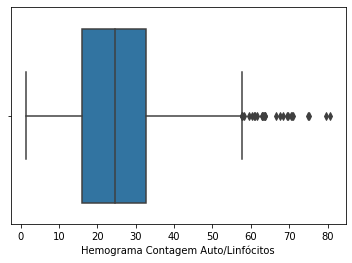

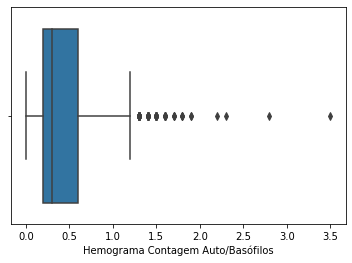

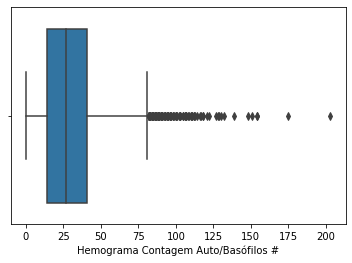

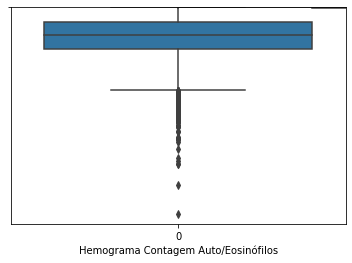

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for coluna in dfFinal.columns:
    plt.figure()
    sns.boxplot(data=dfFinal, x=coluna)

#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Hemácias"]) #4 a 6
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/CHCM"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Hematócrito"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Hemácias"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Plaquetas"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/VCM"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/HCM"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Hemoglobina"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Leucócitos"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Leucócitos #"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/RDW"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Volume Médio Plaquetário"])
#sns.boxplot(data=dfFinal["Dosagem de Uréia/Uréia"])
#sns.boxplot(data=dfFinal["Hemograma Contagem Auto/Linfócitos"])
#sns.boxplot(data=dfFinal["Hemograma Contagem Auto/Basófilos"])
sns.boxplot(data=dfFinal["Hemograma Contagem Auto/Basófilos #"])
#sns.boxplot(data=dfFinal["Hemograma Contagem Auto/Eosinófilos"]) #0,1 a 7

# 5 Importar pickle, ele é o responsável por salvar o modelo

In [12]:
import pickle

In [2]:
!pip install ipykernel>=5.1.2
!pip install pydeck

     |████████████████████████████████| 4.3 MB 4.2 MB/s 
     |████████████████████████████████| 124 kB 51.5 MB/s 
     |████████████████████████████████| 788 kB 50.6 MB/s 
     |████████████████████████████████| 370 kB 47.8 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-too

# 6 Instalar Streamlit e PyNgrok

In [13]:
!pip install streamlit
!pip install pyngrok

     |████████████████████████████████| 8.3 MB 4.2 MB/s 
     |████████████████████████████████| 180 kB 51.7 MB/s 
     |████████████████████████████████| 111 kB 58.5 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=dff395ee1daf1a48bafc5d3ce1d794f22434e79595e69cb3a8f0700877d70fd3
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
     |████████████████████████████████| 745 kB 4.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=475940089fd25cce1a552bef976841b73eeea83cd89cb1ac271890443fbb7027
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


#7 Gerar o Pickle

In [14]:
arquivo = open("dump.pkl", "wb")
pickle.dump([rf,], arquivo)
#0 é o modelo e na posição 1 é o StandScaler
arquivo.close()


#8 Criar Arquivo

In [31]:
%%writefile app.py

import streamlit as st
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

st.write("# PREDIÇÃO DA COVID-19")

st.sidebar.write("## Parâmetros")
#teste = st.sidebar.slider('teste', 3.4, 38.1)
Hemograma_com_Plaquetas_CHCM = st.sidebar.slider("Hemograma com Plaquetas_CHCM", 20, 40)
Hemograma_com_Plaquetas_Hematócrito = st.sidebar.slider("Hemograma com Plaquetas_Hematócrito", 10, 65)
Hemograma_com_Plaquetas_Hemácias = st.sidebar.slider("Hemograma com Plaquetas_Hemácias", 0, 10)
Hemograma_com_Plaquetas_Plaquetas = st.sidebar.slider("Hemograma com Plaquetas_Plaquetas", 0 , 1000)
Hemograma_com_Plaquetas_VCM = st.sidebar.slider("Hemograma com Plaquetas_VCM", 50 , 130)
Hemograma_com_Plaquetas_HCM = st.sidebar.slider("Hemograma com Plaquetas_HCM", 10 , 50)
Hemograma_com_Plaquetas_Hemoglobina = st.sidebar.slider("Hemograma com Plaquetas_Hemoglobina", 0 , 25)
Hemograma_com_Plaquetas_Leucócitos = st.sidebar.slider("Hemograma com Plaquetas_Leucócitos", 0 , 50)
Hemograma_com_Plaquetas_Leucócitos_percentual = st.sidebar.slider("Hemograma com Plaquetas_Leucócitos #", 0 , 40000)
Hemograma_com_Plaquetas_RDW = st.sidebar.slider("Hemograma com Plaquetas_RDW", 10 , 30)
Hemograma_com_Plaquetas_Volume_Médio_Plaquetário = st.sidebar.slider("Hemograma com Plaquetas_Volume Médio Plaquetário", 5 , 17)
Dosagem_de_Uréia_Uréia = st.sidebar.slider("Dosagem de Uréia_Uréia", 0 , 250)
Hemograma_Contagem_Auto_Linfócitos = st.sidebar.slider("Hemograma Contagem Auto_Linfócitos", 0 , 90)
Hemograma_Contagem_Auto_Basófilos = st.sidebar.slider("Hemograma Contagem Auto_Basófilos", 0 , 5)
Hemograma_Contagem_Auto_Basófilos_percentual = st.sidebar.slider("Hemograma Contagem Auto_Basófilos #", 0 , 200)
Hemograma_Contagem_Auto_Eosinófilos = st.sidebar.slider("Hemograma Contagem Auto_Eosinófilos", 0 , 23)


st.write("Este é um aplicativo de dados desenvolvido para a predição do covid")
st.write("Data: 10/10/2021")

modelo = open("dump.pkl", "rb")
rf = pickle.load(modelo)[0]
modelo.close()

dados = {
'Hemograma_com_Plaquetas_CHCM' : Hemograma_com_Plaquetas_CHCM,
'Hemograma_com_Plaquetas_Hematócrito' : Hemograma_com_Plaquetas_Hematócrito,
'Hemograma_com_Plaquetas_Hemácias' : Hemograma_com_Plaquetas_Hemácias,
'Hemograma_com_Plaquetas_Plaquetas' : Hemograma_com_Plaquetas_Plaquetas,
'Hemograma_com_Plaquetas_VCM' : Hemograma_com_Plaquetas_VCM,
'Hemograma_com_Plaquetas_HCM' : Hemograma_com_Plaquetas_HCM,
'Hemograma_com_Plaquetas_Hemoglobina' : Hemograma_com_Plaquetas_Hemoglobina,
'Hemograma_com_Plaquetas_Leucócitos' : Hemograma_com_Plaquetas_Leucócitos,
'Hemograma_com_Plaquetas_Leucócitos_percentual' : Hemograma_com_Plaquetas_Leucócitos_percentual,
'Hemograma_com_Plaquetas_RDW' : Hemograma_com_Plaquetas_RDW,
'Hemograma_com_Plaquetas_Volume_Médio_Plaquetário' : Hemograma_com_Plaquetas_Volume_Médio_Plaquetário,
'Dosagem_de_Uréia_Uréia' : Dosagem_de_Uréia_Uréia,
'Hemograma_Contagem_Auto_Linfócitos' : Hemograma_Contagem_Auto_Linfócitos,
'Hemograma_Contagem_Auto_Basófilos' : Hemograma_Contagem_Auto_Basófilos,
'Hemograma_Contagem_Auto_Basófilos_percentual' : Hemograma_Contagem_Auto_Basófilos_percentual,
'Hemograma_Contagem_Auto_Eosinófilos' : Hemograma_Contagem_Auto_Eosinófilos,
}

entrada = pd.DataFrame(dados, index=[0])

st.write("## Dados de entrada:")
st.write(entrada)

#predicao = rf.predict(entrada)
st.write("## Probabilidade de estar contaminado ou não com a doença:")
#st.write(predicao)

predicao_proba = rf.predict_proba(entrada)
st.write(predicao_proba)

#st.write(rf.feature_importances_)

#decisao = export_graphviz(rf, filled=True, feature_names=entrada.columns, out_file=None)
#st.graphviz_chart(decisao)

Overwriting app.py


# 9 Executar o streamlit com o arquivo

In [15]:
!streamlit run app.py &>dev>null&

#10 Executar o NGrok

In [17]:
from pyngrok import ngrok
url = ngrok.connect(8501)
url

<NgrokTunnel: "http://5ccc-35-236-186-233.ngrok.io" -> "http://localhost:8501">

In [21]:
import pandas as pd

dfpac = pd.read_csv("/content/drive/MyDrive/TCC/EINSTEIN_Pacientes_2.csv", sep='|')
dfpac.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO,CD_PAIS
0,13d016bccfdd1b92039607f025f9dd87a03c3bcb,M,1961,SP,SAO PAULO,CCCC,BR
1,dd3867bd301ef64a20e8a4f62b661ecea83c3a64,M,1980,SP,CARAPICUIBA,CCCC,BR
2,08b0c43e08784fe685588a6fec4425c2e3a6f136,M,1959,SP,SAO PAULO,CCCC,BR
3,8106880fb080a34ae9ef20a64884e8a1a8772c68,F,1971,SP,SAO PAULO,CCCC,BR
4,dd02af1a979c3b31010fe39be0bc9f3380f29047,F,1982,SP,MMMM,CCCC,BR


In [22]:
df = dfpac.join(dfFinal.set_index('ID_PACIENTE'), on='ID_PACIENTE')

KeyError: ignored